In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
df_charging = pd.read_pickle("data/charging_modified.pkl")

### 1) Time a car used a station without charging (in hours)

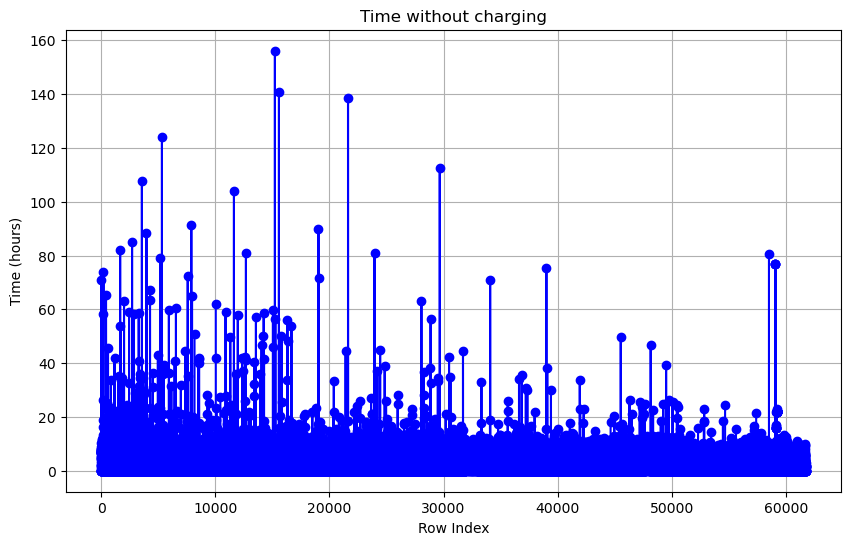

In [3]:
# Plot the time differences
plt.figure(figsize=(10, 6))
plt.plot(df_charging['NoChargingTimeHours'], marker='o', linestyle='-', color='b')
plt.title('Time without charging')
plt.xlabel('Row Index')
plt.ylabel('Time (hours)')
plt.grid(True)
plt.show()

In [4]:
print(df_charging['NoChargingTimeHours'].describe())

count    57643.000000
mean         3.083785
std          4.048385
min          0.000000
25%          0.156667
50%          2.040833
75%          5.197500
max        156.121389
Name: NoChargingTimeHours, dtype: float64


In [5]:
# Problem solved by dropping entries with negative values
# Old problem: negative values not possible -> doneChargingTime is later than disconnectTime
# Interesting: Values at 0 -> disconnectTime at the same time as doneChargingTime
df_charging[df_charging['NoChargingTimeHours'] == 0]

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,spaceID,stationID,userID,NoChargingTime,...,month,userRegistered,user_paymentRequired_values,user_requestedDeparture,user_modifiedAt,user_minutesAvailable,user_milesRequested,user_kWhRequested,user_WhPerMile,user_kWhRequestFulfilment
4140,5bc928ddf9af8b0dc677c743,2018-07-09 00:21:39+00:00,2018-07-09 06:16:09+00:00,2018-07-09 06:16:09+00:00,27.154000,2,CA-320,2-39-78-363,NaN,0 days,...,7,unregistered,None,None,None,NaN,NaN,NaN,NaN,NaN
9853,5bc93f06f9af8b0dc677dcfd,2018-09-20 18:21:06+00:00,2018-09-20 20:20:04+00:00,2018-09-20 20:20:04+00:00,3.584000,2,CA-323,2-39-78-366,NaN,0 days,...,9,unregistered,None,None,None,NaN,NaN,NaN,NaN,NaN
10941,5bc94221f9af8b0dc677dfeb,2018-09-29 22:03:35+00:00,2018-09-29 23:00:39+00:00,2018-09-29 23:00:39+00:00,6.815959,2,CA-323,2-39-78-366,NaN,0 days,...,9,unregistered,None,None,None,NaN,NaN,NaN,NaN,NaN
11886,5be2fc9df9af8b2b0edfa0ae,2018-10-08 00:36:11+00:00,2018-10-08 01:42:18+00:00,2018-10-08 01:42:18+00:00,7.191020,2,CA-323,2-39-78-366,NaN,0 days,...,10,unregistered,None,None,None,NaN,NaN,NaN,NaN,NaN
31000,5d06df21f9af8b49d101c5a4,2019-05-31 22:26:39+00:00,2019-06-01 00:24:47+00:00,2019-06-01 00:24:47+00:00,5.933000,2,CA-322,2-39-78-360,431.0,0 days,...,5,registered,True,"Sat, 01 Jun 2019 00:55:39 GMT","Fri, 31 May 2019 22:27:14 GMT",149.0,60.0,18.0,300.0,-12.067


### 2) Charging time per session (in hours)

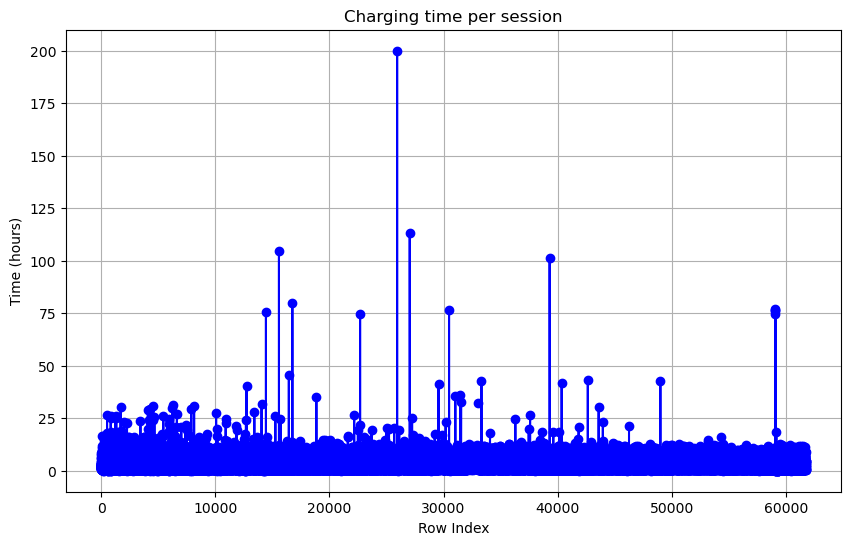

In [6]:
# Plot the time differences
plt.figure(figsize=(10, 6))
plt.plot(df_charging['ChargingTimeHours'], marker='o', linestyle='-', color='b')
plt.title('Charging time per session')
plt.xlabel('Row Index')
plt.ylabel('Time (hours)')
plt.grid(True)
plt.show()

In [7]:
print(df_charging['ChargingTimeHours'].describe())

count    57643.000000
mean         3.476721
std          2.955967
min          0.000000
25%          1.617222
50%          2.741667
75%          4.668333
max        200.015833
Name: ChargingTimeHours, dtype: float64


In [17]:
# Problem solved by dropping entries with negative values
# Old problem: negative values not possible -> connectTime is later than doneChargingTime

In [18]:
# Interesting: Values at 0 -> connectionTime at the same time as doneChargingTime
df_charging[df_charging['ChargingTimeHours'] == 0]

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,spaceID,stationID,userID,NoChargingTime,...,month,userRegistered,user_paymentRequired_values,user_requestedDeparture,user_modifiedAt,user_minutesAvailable,user_milesRequested,user_kWhRequested,user_WhPerMile,user_kWhRequestFulfilment
575,5bc917d0f9af8b0dc677b8d1,2018-05-07 20:47:49+00:00,2018-05-08 01:32:46+00:00,2018-05-07 20:47:49+00:00,3.870,2,CA-501,2-39-89-439,NaN,0 days 04:44:57,...,5,unregistered,None,None,None,NaN,NaN,NaN,NaN,NaN
581,5bc917d0f9af8b0dc677b8da,2018-05-07 20:47:55+00:00,2018-05-08 03:02:19+00:00,2018-05-07 20:47:55+00:00,2.628,2,CA-316,2-39-90-26,NaN,0 days 06:14:24,...,5,unregistered,None,None,None,NaN,NaN,NaN,NaN,NaN


In [19]:
# Interesting: Extreme case of over 200 hours charging time
df_charging[df_charging['ChargingTimeHours'] > 200]

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,spaceID,stationID,userID,NoChargingTime,...,month,userRegistered,user_paymentRequired_values,user_requestedDeparture,user_modifiedAt,user_minutesAvailable,user_milesRequested,user_kWhRequested,user_WhPerMile,user_kWhRequestFulfilment
25934,5cb3d172f9af8b4551261e31,2019-03-29 16:00:02+00:00,2019-04-07 14:19:21+00:00,2019-04-07 00:00:59+00:00,13.198,2,CA-317,2-39-91-437,431.0,0 days 14:18:22,...,3,registered,True,"Fri, 29 Mar 2019 20:11:02 GMT","Fri, 29 Mar 2019 16:01:13 GMT",251.0,60.0,18.0,300.0,-4.802


### 3) kWh delivered per session

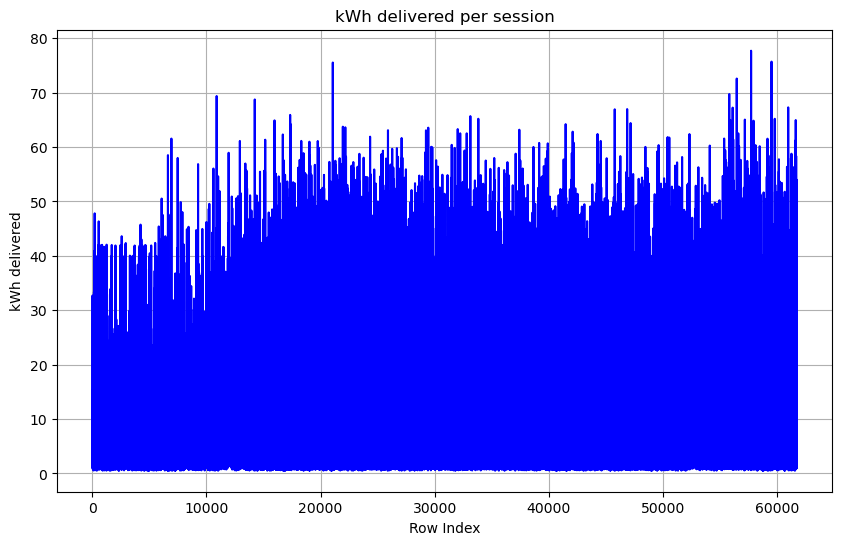

In [14]:
# Plot the differences in kWh delivery per session
plt.figure(figsize=(10, 6))
plt.plot(df_charging['kWhDelivered'], linestyle='-', color='b')
#plt.plot(df_charging.index, df_charging['kWhDelivered'])
plt.title('kWh delivered per session')
plt.xlabel('Row Index')
plt.ylabel('kWh delivered')
plt.grid(True)
plt.show()

In [10]:
print(df_charging['kWhDelivered'].describe())

count    61731.000000
mean        11.589689
std         10.088103
min          0.501000
25%          5.082500
50%          8.991000
75%         13.991000
max         77.700000
Name: kWhDelivered, dtype: float64


### 4) Trade-off 'kWh requested' and 'kWh delivered'

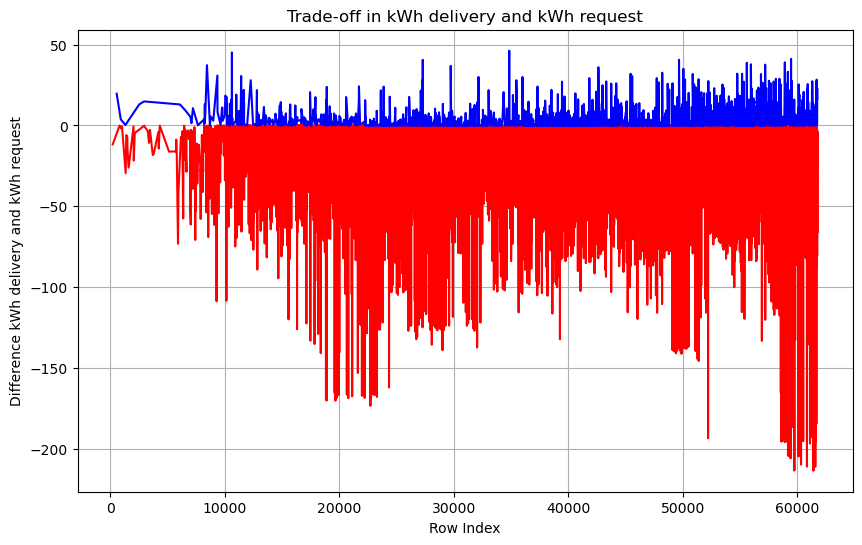

In [11]:
# Plot the difference in kWh request and kWh delivery (to show if requests have been fulfilled (positive, blue) or not (negative, red))
plt.figure(figsize=(10, 6))
#plt.scatter(df_charging[df_charging['user_kWhRequestFulfilment'] < 0].index, df_charging[df_charging['user_kWhRequestFulfilment'] < 0]['user_kWhRequestFulfilment'], color='red', label='bad')
#plt.scatter(df_charging[df_charging['user_kWhRequestFulfilment'] >= 0].index, df_charging[df_charging['user_kWhRequestFulfilment'] >= 0]['user_kWhRequestFulfilment'], color='blue', label='good')
plt.plot(df_charging[df_charging['user_kWhRequestFulfilment'] < 0].index, df_charging[df_charging['user_kWhRequestFulfilment'] < 0]['user_kWhRequestFulfilment'], color='red', label='bad')
plt.plot(df_charging[df_charging['user_kWhRequestFulfilment'] >= 0].index, df_charging[df_charging['user_kWhRequestFulfilment'] >= 0]['user_kWhRequestFulfilment'], color='blue', label='good')
plt.title('Trade-off in kWh delivery and kWh request')
plt.xlabel('Row Index')
plt.ylabel('Difference kWh delivery and kWh request')
plt.grid(True)
plt.show()

In [12]:
print(df_charging['user_kWhRequestFulfilment'].describe())

count    45550.000000
mean       -11.365717
std         16.433534
min       -213.686000
25%        -14.074750
50%         -6.350000
75%         -2.727250
max         46.281000
Name: user_kWhRequestFulfilment, dtype: float64


In [15]:
# Interesting: Extreme case where kWh request has not been fulfilled by 200 kWh
# Also interesting: All cases with a difference over 200 kWh with same user, who requested the same amount of kWh each time
# Also interesting: All cases around the time between July and September 2021
df_charging[df_charging['user_kWhRequestFulfilment'] < -200]

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,spaceID,stationID,userID,NoChargingTime,...,month,userRegistered,user_paymentRequired_values,user_requestedDeparture,user_modifiedAt,user_minutesAvailable,user_milesRequested,user_kWhRequested,user_WhPerMile,user_kWhRequestFulfilment
59172,610c8293f9af8b0580e98728,2021-07-21 01:54:28+00:00,2021-07-21 03:37:35+00:00,2021-07-21 03:37:26+00:00,11.051,2,CA-304,2-39-138-29,675.0,0 days 00:00:09,...,7,registered,True,"Thu, 22 Jul 2021 01:56:28 GMT","Wed, 21 Jul 2021 01:54:28 GMT",1442.0,140.0,215.32,1538.0,-204.269
59242,610f2593f9af8b09a2bbfa80,2021-07-23 01:49:19+00:00,2021-07-23 03:43:40+00:00,2021-07-23 03:43:35+00:00,10.871,2,CA-303,2-39-139-28,675.0,0 days 00:00:05,...,7,registered,True,"Sat, 24 Jul 2021 01:51:19 GMT","Fri, 23 Jul 2021 01:49:19 GMT",1442.0,140.0,215.32,1538.0,-204.449
59313,6115bd10f9af8b13f3746253,2021-07-28 01:50:10+00:00,2021-07-28 03:39:11+00:00,2021-07-28 03:39:05+00:00,11.336,2,CA-304,2-39-138-29,675.0,0 days 00:00:06,...,7,registered,True,"Thu, 29 Jul 2021 01:52:10 GMT","Wed, 28 Jul 2021 01:50:16 GMT",1442.0,140.0,215.32,1538.0,-203.984
59395,611860a6f9af8b180918c41d,2021-07-30 01:47:04+00:00,2021-07-30 03:36:53+00:00,2021-07-30 03:36:48+00:00,9.268,2,CA-304,2-39-138-29,675.0,0 days 00:00:05,...,7,registered,True,"Sat, 31 Jul 2021 01:49:04 GMT","Fri, 30 Jul 2021 01:47:03 GMT",1442.0,140.0,215.32,1538.0,-206.052
59728,61219b3bf9af8b2683096d6c,2021-08-06 03:39:11+00:00,2021-08-06 03:56:04+00:00,2021-08-06 03:55:59+00:00,1.733,2,CA-303,2-39-139-28,675.0,0 days 00:00:05,...,8,registered,True,"Sat, 07 Aug 2021 03:41:11 GMT","Fri, 06 Aug 2021 03:39:11 GMT",1442.0,140.0,215.32,1538.0,-213.587
60092,612ad6cbf9af8b3528df1f37,2021-08-13 01:52:30+00:00,2021-08-13 03:35:21+00:00,2021-08-13 03:35:16+00:00,10.435,2,CA-305,2-39-131-30,675.0,0 days 00:00:05,...,8,registered,True,"Sat, 14 Aug 2021 01:54:30 GMT","Fri, 13 Aug 2021 01:52:29 GMT",1442.0,140.0,215.32,1538.0,-204.885
60310,61316d83f9af8b3f503ed34d,2021-08-18 01:55:01+00:00,2021-08-18 03:36:46+00:00,2021-08-18 03:36:41+00:00,5.398,2,CA-305,2-39-131-30,675.0,0 days 00:00:05,...,8,registered,True,"Thu, 19 Aug 2021 01:57:01 GMT","Wed, 18 Aug 2021 01:55:01 GMT",1442.0,140.0,215.32,1538.0,-209.922
60828,613e9d5ef9af8b53e4212166,2021-08-27 01:50:56+00:00,2021-08-27 02:29:56+00:00,2021-08-27 02:29:52+00:00,4.194,2,CA-304,2-39-138-29,675.0,0 days 00:00:04,...,8,registered,True,"Sat, 28 Aug 2021 01:52:56 GMT","Fri, 27 Aug 2021 01:50:59 GMT",1442.0,140.0,215.32,1538.0,-211.126
61393,614d1c1ff9af8b6a7d813de4,2021-09-08 01:49:24+00:00,2021-09-08 03:37:19+00:00,2021-09-08 02:40:02+00:00,1.634,2,CA-306,2-39-130-31,675.0,0 days 00:57:17,...,9,registered,True,"Thu, 09 Sep 2021 01:51:24 GMT","Wed, 08 Sep 2021 01:49:24 GMT",1442.0,140.0,215.32,1538.0,-213.686
61556,614fbf18f9af8b6e51664224,2021-09-10 01:50:04+00:00,2021-09-10 03:37:00+00:00,2021-09-10 03:20:26+00:00,4.065,2,CA-304,2-39-138-29,675.0,0 days 00:16:34,...,9,registered,True,"Sat, 11 Sep 2021 01:52:04 GMT","Fri, 10 Sep 2021 01:50:06 GMT",1442.0,140.0,215.32,1538.0,-211.255
